# Klassifikation Kletterschuhe


## Daten

Eigene Datenerhebung mittels Online-Umfrage: https://forms.gle/PTs57af6sLqk32Wx7

Die Daten wurden getrennt in User-Daten und Schuhe

body_features.csv: Enthält alle Informationen rund um die Person (Geschlecht, Größe, Gewicht, Fußform, Fußmaße, Klettererfahrung)

shoe_survey.csv: Sämtliche von den Personen eingetragene Kletterschuhe (Marke, Modell, Eigenschaften, Bewertungen, etc.)



## Ziel: Schuhmodell vorhersagen

Kann mithilfe der Erfahrungsberichte und Körpereigenschaften der Befragten ein Kletterschuh vorhergesagt werden?

Target Label: shoe_model

# Explorative Analyse

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## body_features

In [385]:
users = pd.read_csv('./data/body_features.csv')

In [386]:
users.head(3)

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
0,1,Männlich,168,61,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,Vans Authentic,4.0
1,2,Weiblich,168,63,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,Adidas cloudfoam,3.0
2,3,Männlich,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0


In [387]:
users.tail(2)

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
92,93,Weiblich,158,53,31,21.5,8.7,Griechischer Fußtyp,Nein,36.0,Sketchers,2.0
93,94,Männlich,191,92,60,29.4,11.0,Griechischer Fußtyp,"Hallux Valgus, Senkfuß",46.5,NaN,23.0


In [388]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userid             94 non-null     int64  
 1   gender             94 non-null     object 
 2   height             94 non-null     int64  
 3   weight             94 non-null     int64  
 4   age                94 non-null     int64  
 5   foot_len           94 non-null     float64
 6   foot_width         94 non-null     float64
 7   foot_family        94 non-null     object 
 8   foot_deform        94 non-null     object 
 9   street_shoe_size   94 non-null     float64
 10  fav_sneaker_model  81 non-null     object 
 11  exp                94 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 8.9+ KB


In [389]:
users.columns

Index(['userid', 'gender', 'height', 'weight', 'age', 'foot_len', 'foot_width',
       'foot_family', 'foot_deform', 'street_shoe_size', 'fav_sneaker_model',
       'exp'],
      dtype='object')

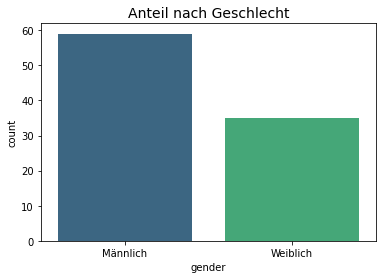

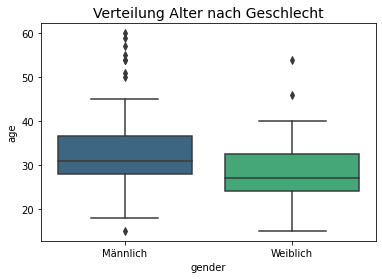

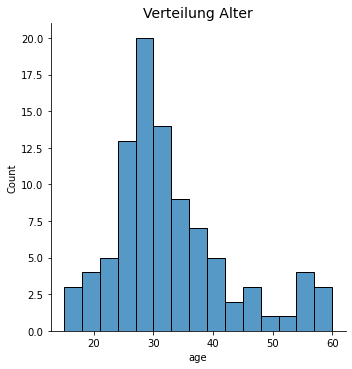

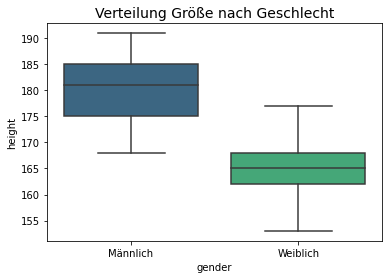

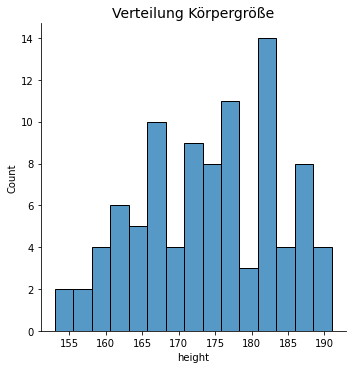

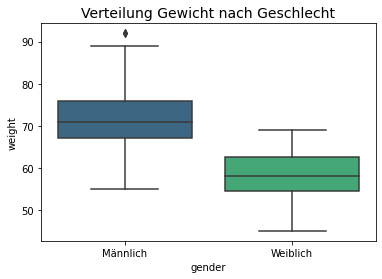

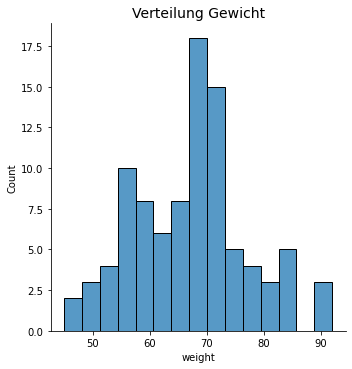

In [390]:
sns.countplot(x='gender', data=users, palette='viridis')
plt.title("Anteil nach Geschlecht", fontsize=14)
plt.show()
sns.boxplot(x='gender', y='age', data=users, palette='viridis')
plt.title("Verteilung Alter nach Geschlecht", fontsize=14)
plt.show()
sns.displot(x='age', data=users, bins=15)
plt.title("Verteilung Alter", fontsize=14)
plt.show()
sns.boxplot(x='gender', y='height', data=users, palette='viridis')
plt.title("Verteilung Größe nach Geschlecht", fontsize=14)
plt.show()
sns.displot(x='height', data=users, bins=15)
plt.title("Verteilung Körpergröße", fontsize=14)
plt.show()
sns.boxplot(x='gender', y='weight', data=users, palette='viridis')
plt.title("Verteilung Gewicht nach Geschlecht", fontsize=14)
plt.show()
sns.displot(x='weight', data=users, bins=15)
plt.title("Verteilung Gewicht", fontsize=14)
plt.show()

In [391]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp               43
Römischer Fußtyp                 30
Griechischer Fußtyp              20
Mix aus Römisch und Ägyptisch     1
Name: foot_family, dtype: int64

In [392]:
users[users['foot_family'] == 'Mix aus Römisch und Ägyptisch']

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
13,14,Weiblich,164,58,24,23.0,8.3,Mix aus Römisch und Ägyptisch,Senkfuß,38.0,Nike,3.0


In [393]:
users.at[13,'foot_family'] = 'Ägyptischer Fußtyp'

In [394]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp     44
Römischer Fußtyp       30
Griechischer Fußtyp    20
Name: foot_family, dtype: int64

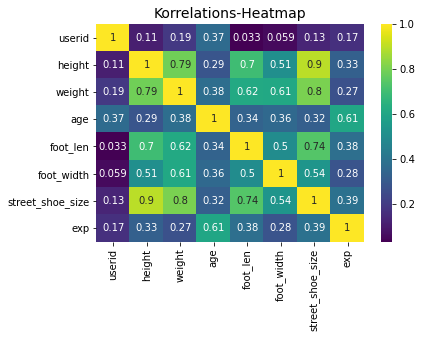

In [395]:
sns.heatmap(users.corr(), cmap='viridis', annot=True)
plt.title("Korrelations-Heatmap", fontsize=14)
plt.show()

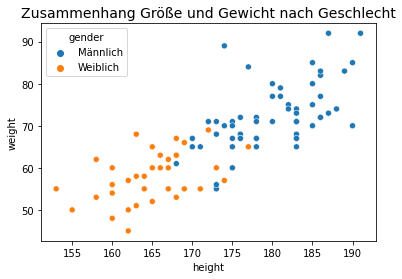

In [396]:
sns.scatterplot(x='height', y='weight', data=users, hue='gender')
plt.title("Zusammenhang Größe und Gewicht nach Geschlecht", fontsize=14)
plt.show()

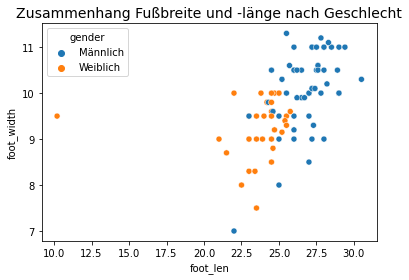

In [397]:
sns.scatterplot(x='foot_len', y='foot_width', data=users, hue='gender')
plt.title("Zusammenhang Fußbreite und -länge nach Geschlecht", fontsize=14)
plt.show()

## shoe_features

In [398]:
shoes = pd.read_csv('./data/shoe_survey.csv')

In [399]:
shoes.isnull().sum()

userid                          0
timestamp                       0
shoe_brand                    402
shoe_model                    402
Modell nicht in der Liste?    557
climb_shoe_size               402
shoe_age                      402
favourite                     405
shoe_vorspann                 402
shoe_downturn                 402
shoe_asymetry                 402
shoe_closing_type             402
climb_style                   402
terrain                       402
rate_fit                      402
rate_comfort                  402
rate_stiffness                402
use_freq                      402
climb_grade                   402
overall_rating                402
dtype: int64

In [400]:
shoes = shoes.dropna(subset=['shoe_brand'])
shoes.reset_index(inplace=True, drop=True)

In [401]:
shoes.head(3)

,userid,timestamp,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,climb_style,terrain,rate_fit,rate_comfort,rate_stiffness,use_freq,climb_grade,overall_rating
0,1,24.02.2021 22:27:44,La Sportiva,La Sportiva - SKWAMA,NaN,39.0,2.0,Ja,Ja,Ja,Nein,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,4.0,4.0,Fortgeschritten (UIAA 7 - 9),5.0
1,2,25.02.2021 08:26:50,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,NaN,37.5,0.7,Ja,Ja,Ja,Ja,Klett,Bouldern,Halle,4.0,4.0,3.0,3.0,Fortgeschritten (UIAA 7 - 9),4.0
2,3,25.02.2021 10:28:25,La Sportiva,La Sportiva - SKWAMA,NaN,42.5,1.0,Ja,Ja,Ja,Ja,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,5.0,5.0,Fortgeschritten (UIAA 7 - 9),5.0


In [402]:
shoes.drop('timestamp', axis=1, inplace=True)

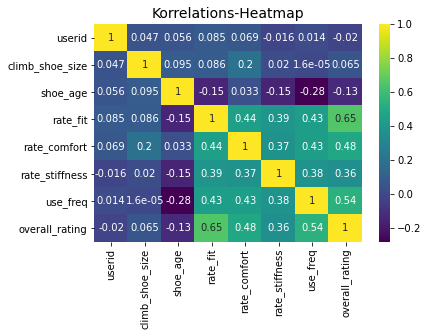

In [403]:
sns.heatmap(shoes.corr(), cmap='viridis', annot=True)
plt.title("Korrelations-Heatmap", fontsize=14)
plt.show()

In [404]:
shoes['shoe_model'].value_counts().sort_values(ascending=False).head(10)

Sonstige                    15
La Sportiva - SKWAMA        11
Scarpa - VAPOR V             8
Ocun - OZONE QC              7
La Sportiva - OTAKI          5
Five Ten - HIANGLE           5
Red Chili - SPIRIT VCR       5
Scarpa - DRAGO               5
Scarpa - INSTINCT VSR        4
Scarpa - INSTINCT VS WMN     4
Name: shoe_model, dtype: int64

In [405]:
shoes['shoe_model'].value_counts().sort_values(ascending=False).head(10)

Sonstige                    15
La Sportiva - SKWAMA        11
Scarpa - VAPOR V             8
Ocun - OZONE QC              7
La Sportiva - OTAKI          5
Five Ten - HIANGLE           5
Red Chili - SPIRIT VCR       5
Scarpa - DRAGO               5
Scarpa - INSTINCT VSR        4
Scarpa - INSTINCT VS WMN     4
Name: shoe_model, dtype: int64

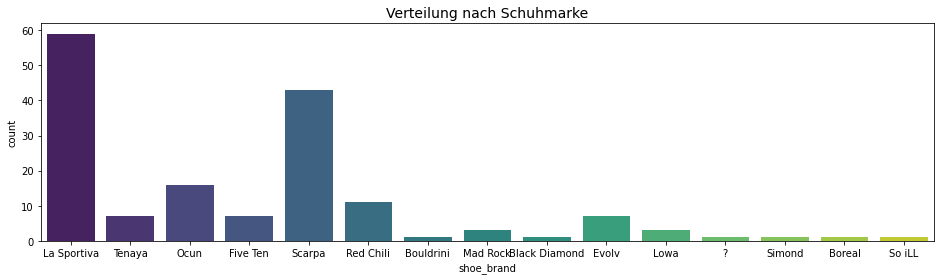

In [406]:
plt.figure(figsize=(16,4))
sns.countplot(x='shoe_brand', data=shoes, palette='viridis')
plt.title("Verteilung nach Schuhmarke", fontsize=14)
plt.show()

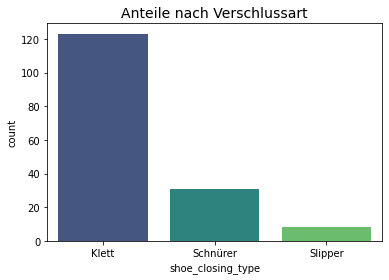

In [407]:
sns.countplot(x='shoe_closing_type', data=shoes, palette='viridis')
plt.title("Anteile nach Verschlussart", fontsize=14)
plt.show()

In [408]:
shoes['climb_grade'].unique()

array(['Fortgeschritten (UIAA 7 - 9)', 'Anfänger (UIAA < 7)',
       'Profi (UIAA > 9)'], dtype=object)

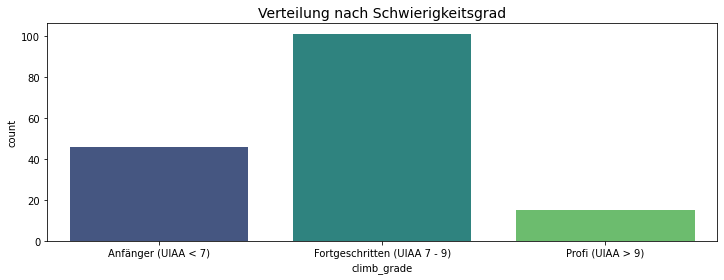

In [409]:
order = ['Anfänger (UIAA < 7)','Fortgeschritten (UIAA 7 - 9)',
       'Profi (UIAA > 9)']
plt.figure(figsize=(12,4))
sns.countplot(x='climb_grade', data=shoes, palette='viridis', order=order)
plt.title("Verteilung nach Schwierigkeitsgrad", fontsize=14)
plt.show()

## Zusammenhänge Körper- & Schuheigenschaften

In [410]:
df = pd.merge(shoes, users, how='left', on=['userid'], suffixes=('_left', '_right'))

In [411]:
df[df['userid'] == 94]

,userid,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,...,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
93,94,Red Chili,Red Chili - SPIRIT VCR,NaN,46.0,5.0,Ja,Nein,Nein,Nein,...,191,92,60,29.4,11.0,Griechischer Fußtyp,"Hallux Valgus, Senkfuß",46.5,NaN,23.0


In [412]:
df.tail(2)

,userid,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,...,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
160,59,Ocun,Ocun - OZONE QC,NaN,42.0,4.0,Nein,Ja,Ja,Ja,...,175,70,27,26.7,9.9,Ägyptischer Fußtyp,Nein,42.5,NaN,6.0
161,4,La Sportiva,La Sportiva - SOLUTION COMP,NaN,43.0,1.0,Ja,Nein,Ja,Ja,...,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      162 non-null    int64  
 1   shoe_brand                  162 non-null    object 
 2   shoe_model                  162 non-null    object 
 3   Modell nicht in der Liste?  7 non-null      object 
 4   climb_shoe_size             162 non-null    float64
 5   shoe_age                    162 non-null    float64
 6   favourite                   159 non-null    object 
 7   shoe_vorspann               162 non-null    object 
 8   shoe_downturn               162 non-null    object 
 9   shoe_asymetry               162 non-null    object 
 10  shoe_closing_type           162 non-null    object 
 11  climb_style                 162 non-null    object 
 12  terrain                     162 non-null    object 
 13  rate_fit                    162 non

In [414]:
df.isnull().sum()

userid                          0
shoe_brand                      0
shoe_model                      0
Modell nicht in der Liste?    155
climb_shoe_size                 0
shoe_age                        0
favourite                       3
shoe_vorspann                   0
shoe_downturn                   0
shoe_asymetry                   0
shoe_closing_type               0
climb_style                     0
terrain                         0
rate_fit                        0
rate_comfort                    0
rate_stiffness                  0
use_freq                        0
climb_grade                     0
overall_rating                  0
gender                          0
height                          0
weight                          0
age                             0
foot_len                        0
foot_width                      0
foot_family                     0
foot_deform                     0
street_shoe_size                0
fav_sneaker_model              24
exp           

In [415]:
df.head(3)

,userid,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,...,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
0,1,La Sportiva,La Sportiva - SKWAMA,NaN,39.0,2.0,Ja,Ja,Ja,Nein,...,168,61,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,Vans Authentic,4.0
1,2,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,NaN,37.5,0.7,Ja,Ja,Ja,Ja,...,168,63,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,Adidas cloudfoam,3.0
2,3,La Sportiva,La Sportiva - SKWAMA,NaN,42.5,1.0,Ja,Ja,Ja,Ja,...,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0


In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.title("Korrelations-Heatmap 2", fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='foot_len', y='foot_width', data=df, hue='shoe_brand')

plt.title("Zusammenhang Größe und Gewicht nach Schuhmarke", fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='height', y='weight', data=df, hue='shoe_brand')
plt.title("Zusammenhang Größe und Gewicht nach Schuhmarke", fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='climb_shoe_size', y='height', data=df, hue='shoe_brand')
plt.title("Zusammenhang Kletterschuhgröße und Körpergröße nach Schuhmarke", fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='climb_shoe_size', y='exp', data=df, hue='climb_grade')
plt.title("Zusammenhang Kletterschuhgröße und Körpergröße nach Schuhmarke", fontsize=14)
plt.show()

# Feature Engineering

In [ ]:
df.info()

In [ ]:
df.describe().transpose()

## Fehlende Werte

In [ ]:
df.isnull().any()

In [ ]:
df.drop('fav_sneaker_model',axis=1, inplace=True)

In [ ]:
df['favourite'] = df['favourite'].fillna('Ja')

In [ ]:
for i in df[df['Modell nicht in der Liste?'].notna() == True].index:
    df.at[i, 'shoe_model'] = df['Modell nicht in der Liste?'].iloc[i]

df[df['Modell nicht in der Liste?'].notna() == True].head(3)

In [ ]:
df.at[61,'shoe_model'] = 'Diamond'
df.iloc[61]

In [ ]:
df.drop('Modell nicht in der Liste?',axis=1,inplace=True)

In [ ]:
df.isnull().any()

## Ausreißer behandeln

In [ ]:
df.select_dtypes(['int64','float64']).columns

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(14, 8))
fig.suptitle('Übersicht Verteilungen')
sns.boxplot(y='climb_shoe_size',data=df,palette='viridis', ax=axs[0,0])
sns.boxplot(y='shoe_age',data=df,palette='viridis',ax=axs[0,1])
sns.boxplot(y='height',data=df,palette='viridis',ax=axs[0,2])
sns.boxplot(y='weight',data=df,palette='viridis',ax=axs[1,0])
sns.boxplot(y='age',data=df,palette='viridis',ax=axs[1,1])
sns.boxplot(y='foot_len',data=df,palette='viridis',ax=axs[1,2])
sns.boxplot(y='foot_width',data=df,palette='viridis',ax=axs[2,1])

plt.show()

In [ ]:
df[['climb_shoe_size','street_shoe_size']][df['climb_shoe_size']<30]

In [ ]:
df.at[16,'climb_shoe_size'] = 39
df.iloc[16][['climb_shoe_size','street_shoe_size']]

In [ ]:
df[df['shoe_age']>4]

In [ ]:
df['shoe_age'].std()

In [ ]:
df[df['weight']>85]

In [ ]:
df[df['foot_len']<20]

In [ ]:
df.at[68,'foot_len'] = round(df['foot_len'].mean(),2)
df.at[130,'foot_len'] = round(df['foot_len'].mean(),2)
df['foot_len'].iloc[[68,130]]

In [ ]:
df['foot_width'][df['foot_width']<8]

In [ ]:
df.at[[26],'foot_width'] = round(df['foot_width'].mean(),2)
df.at[[43],'foot_width'] = round(df['foot_width'].mean(),2)
df.at[[117],'foot_width'] = round(df['foot_width'].mean(),2)
df.at[[149],'foot_width'] = round(df['foot_width'].mean(),2)

df['foot_width'].iloc[[26,43,117,149]]

## Versuch: Gruppieren durch Clustern

In [ ]:
from sklearn.cluster import KMeans

cluster = KMeans(3, random_state=0)

cluster.fit(df[['height','weight']])

df['group'] = cluster.predict(df[['height','weight']])

sns.scatterplot(x='weight',y='height',data=df, hue='group', palette='viridis')

In [ ]:
cluster = KMeans(3, random_state=0)

cluster.fit(df[['height','climb_shoe_size']])

df['group2'] = cluster.predict(df[['height','weight']])

sns.scatterplot(x='climb_shoe_size',y='height',data=df, hue='group', palette='viridis')

## Kategoriale / Ordinalwerte umwandeln

In [ ]:
df.select_dtypes(['object']).columns

In [ ]:
df['shoe_model'].value_counts()

In [ ]:
df['shoe_brand'].value_counts()

In [ ]:
df[df['shoe_brand'] == '?']

In [ ]:
df.drop('shoe_brand',axis=1,inplace=True)

In [ ]:
df['shoe_model'][df['shoe_model'] == 'Sonstige'].index

In [ ]:
df.drop([18, 27, 31, 54, 55, 98, 114, 119],inplace=True)

In [ ]:
df.select_dtypes(['object']).columns

In [ ]:
df['climb_style'].value_counts()

In [ ]:
df['climb_style'].unique()

In [ ]:
def strip_list(liste):
    stripped = []
    
    for n in liste:
        stripped.append(n.strip())
    
    return stripped

In [ ]:
styles = ['Sportklettern', 'Bouldern', 'Mehrseillängen']
for style in styles:
    df[style.lower().split()[0]] = df.apply(lambda row: 1 if style in strip_list(row.climb_style.split(',')) else 0, axis=1)
df.head()

In [ ]:
df.drop('climb_style',axis=1,inplace=True)

In [ ]:
df.select_dtypes(['object']).columns

In [ ]:
df['shoe_closing_type'].value_counts()

In [ ]:
df['terrain'].value_counts()

In [ ]:
df['halle'] = df['terrain'].map(lambda row: 1 if row in ['Halle', 'Beides'] else 0)

In [ ]:
df['outdoor'] = df['terrain'].map(lambda row: 1 if row in ['Outdoor', 'Beides'] else 0)

In [ ]:
df.drop('terrain',axis=1,inplace=True)

In [ ]:
df.select_dtypes(['object']).columns

In [ ]:
df['climb_grade'].value_counts()

In [ ]:
df['beginner'] = df['climb_grade'].map(lambda row: 1 if row in ['Anfänger (UIAA < 7)'] else 0)
df['advanced'] = df['climb_grade'].map(lambda row: 1 if row in ['Fortgeschritten (UIAA 7 - 9)'] else 0)
df['pro'] = df['climb_grade'].map(lambda row: 1 if row in ['Profi (UIAA > 9)'] else 0)

In [ ]:
df.head()

In [ ]:
df['foot_deform'].value_counts()

In [ ]:
df[df['foot_deform'] == 'Nein, abgeflachtes Quergewölbe, aber noch kein Spreizfuß']

In [ ]:
df.at[61,'foot_deform'] = 'Nein'
df.at[127,'foot_deform'] = 'Nein'

In [ ]:
df['foot_deform'].value_counts()

In [ ]:
df[df['foot_deform'] == 'Hallux Valgus, Senkfuß']

In [ ]:
def strip_list(liste):
    stripped = []
    
    for n in liste:
        stripped.append(n.strip())
    
    return stripped

deformations = ['Hallux Valgus', 'Senkfuß','Spreizfuß','Plattfuß', 'Hohlfuß','Knickfuß', 'Fersenbein']

for deform in deformations:
    df[deform.lower().split()[0]] = df.apply(lambda row: 1 if deform in strip_list(row.foot_deform.split(',')) else 0, axis=1)

df.head(3)

In [ ]:
df.drop(['foot_deform', 'climb_grade'],axis=1,inplace=True)

In [ ]:
df.select_dtypes(['object']).columns

In [ ]:
df['favourite'] = df['favourite'].map(lambda row: 1 if row in ['Ja'] else 0)

In [ ]:
df.select_dtypes(['object']).columns

In [ ]:
df['foot_family'].value_counts()

In [ ]:
df['egypt'] = df['foot_family'].map(lambda row: 1 if row in ['Ägyptischer Fußtyp'] else 0)
df['rome'] = df['foot_family'].map(lambda row: 1 if row in ['Römischer Fußtyp'] else 0)
df['greek'] = df['foot_family'].map(lambda row: 1 if row in ['Griechischer Fußtyp'] else 0)
df['shoe_vorspann'] = df['shoe_vorspann'].map(lambda row: 1 if row in ['Ja'] else 0)
df['shoe_downturn'] = df['shoe_downturn'].map(lambda row: 1 if row in ['Ja'] else 0)
df['shoe_asymetry'] = df['shoe_asymetry'].map(lambda row: 1 if row in ['Ja'] else 0)

df.drop('foot_family',axis=1, inplace=True)
df.head()

In [ ]:
dummies = pd.get_dummies(data=df, columns=['shoe_closing_type', 'gender'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

df_targets = pd.get_dummies(data=df, columns=['shoe_model'],drop_first=True)

In [ ]:
df.iloc[1]

In [ ]:
df.select_dtypes(['object']).columns

In [ ]:
df.drop(['userid','shoe_model','shoe_closing_type','gender'],axis=1, inplace=True)

In [ ]:
df.shape

In [ ]:
print(df.columns)

## Versuch 2: Merkmale reduzieren durch Hauptkomponenten-Analyse (PCA)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

features = StandardScaler().fit_transform(df.values)

pca = PCA(n_components=0.99, whiten=True)

features_pca = pca.fit_transform(features)

print("Ursprüngliche Anzahl Features: ", features.shape[1])
print("Reduzierte Anzahl Features: ", features_pca.shape[1])

# Klassifizierung

## K-Nearest Neighbor

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

## Logistische Regression

# Multiklassen Klassifizierung

### Ziel: Mehrere Outputs vorhersagen

### Grundprinzipien:
One vs. All -> Wenn eine Klasse 1 ist, sind alle anderen 0<br>
One vs. One -> Pärchenweiser Vergleich aller Outputklassen 



## Logistische Regression

## Neuronales Netz 

Output Aktivirungsfunktion: Sigmoid

In [82]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [149]:
X = df.drop('userid',axis=1).values
y = df_y.values

print(len(y))

94


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [151]:
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
X_train.shape

(65, 17)

In [153]:
X_test.shape

(29, 17)

In [154]:
y_train.shape

(65, 66)

In [155]:
y_test.shape

(29, 66)

In [169]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [177]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(units=17, activation='relu'))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=66, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [180]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 0.00% (0.00%)


In [167]:
#model.fit(x=X_train, 
#          y=y_train, 
#          epochs=100,
#          batch_size=10,
#          validation_data=(X_test, y_test), verbose=1
#          )

In [171]:
#model_loss = pd.DataFrame(model.history.history)

In [172]:
#model_loss.plot()